## Load Packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

## Kink solution at zero temperature

In [2]:
def kink_eq(dx, N):
    dx = float(dx)
    #N = int(round(L/dx))
    phi = np.zeros(N+1)
    v = np.zeros(N+1)
    x = np.linspace(-N*dx/2, N*dx/2, N+1)
    #phi = 0.0
    phi[0] = -0.9999
    v[0] = 0.001
    phi[N] = 0.99999
    for i in range(0, N-1):
        #phi = phi - dx * ( phi**2 - 1 )
        v[i+1] = v[i] + 2 * dx * phi[i] * ( (phi[i])**2 - 1 )
        phi[i+1] = phi[i] + dx * v[i+1]
    return x, phi  #return phi[i]

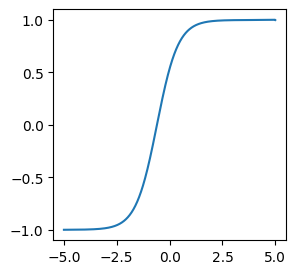

In [3]:
x, phi = kink_eq(dx=0.01, N=1000)
plt.figure(figsize=(3, 3))
plt.plot(x, phi)
plt.show()

## Kink solution at finite temperature: Langevin equation

In [40]:
np.zeros((10, 10))

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [5]:
def langevin_eq(N_pte, N_sta, T):
  # Code solves the Langevin equation by starting at zero configurations and
  # establishes after N_sta realizations. In our present case, N_sta = 8000.
  # The boundary conditions used are required to generate kinks solutions
  dtau = 0.001
  dx = 0.316
  dy = 0.316

  Phi = np.zeros((N_pte, N_pte)) # initial Phi conf. with N size

  for n in range(0, N_sta):
    noise = np.random.normal(loc=0.0,scale=1.0,size=N_pte) # defines noise with N size
    for i in range(0, N_pte-1):
      for j in range(0, N_pte-1):
        #Phi[0] = -0.999                                      # initial condition
        #Phi[N_pte-1] = 0.999                                 # final condition
        Phi[i, j] = Phi[i, j] + (dtau/dx**2) * (Phi[i + 1, j] - 2 * Phi[i, j] + Phi[i - 1, j] ) \
        + (dtau/dy**2) * (Phi[i, j + 1] - 2 * Phi[i, j] + Phi[i, j - 1]) 
        - dtau * 2 * Phi[i] * (Phi[i]**2 -1) +  np.sqrt(2 * T * dtau) * noise[i]

  return Phi

In [6]:
# Shows a configs
N_pte = 100
dx = 0.316
x_lattice= np.linspace(-N_pte*dx/2, N_pte*dx/2, N_pte) # N size
y_lattice= np.linspace(-N_pte*dx/2, N_pte*dx/2, N_pte) # N size

list_phi = langevin_eq(N_pte = N_pte, N_sta = 6000, T=0.0001)

KeyboardInterrupt: 

In [ ]:
# Plot the numerical solution
X, Y = np.meshgrid(np.linspace(0, Lx, Nx), np.linspace(0, Ly, Ny))
plt.figure(figsize=(8, 6))
plt.contourf(X, Y, phi.T, cmap='viridis')
plt.colorbar(label='phi')
plt.title('Numerical Solution of the Differential Equation')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

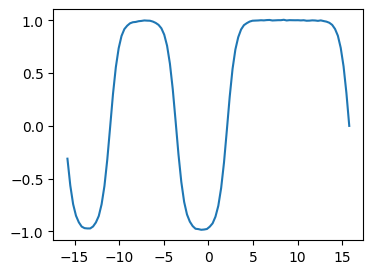

In [38]:
# Shows a configs
N_pte = 100
dx = 0.316
x_lattice= np.linspace(-N_pte*dx/2, N_pte*dx/2, N_pte) # N size
y_lattice= np.linspace(-N_pte*dx/2, N_pte*dx/2, N_pte) # N size

plt.figure(figsize=(4, 3))
list_phi = langevin_eq(N_pte = N_pte, N_sta = 6000, T=0.0001)
plt.plot(x_lattice, list_phi)
# plt.plot(x_lattice, langevin_eq(N_pte = 100, N_sta = 6000, T=0.01))
plt.show()

In [36]:
np.mean(list_phi)

-0.13220985150944042

In [32]:
list_phi

array([ 0.30644792,  0.55780872,  0.73938285,  0.8485524 ,  0.91639709,
        0.95718305,  0.97428012,  0.98457764,  0.99350858,  0.99008945,
        0.99414012,  0.98739207,  0.97545307,  0.95894546,  0.92697212,
        0.86490781,  0.75932319,  0.5840305 ,  0.33774224,  0.03290661,
       -0.27794294, -0.54086457, -0.72956608, -0.84900283, -0.91240978,
       -0.95216291, -0.97298688, -0.98377252, -0.98563585, -0.98392404,
       -0.97526263, -0.96123832, -0.93122772, -0.87590694, -0.77908446,
       -0.62821031, -0.40370719, -0.1088799 ,  0.20642273,  0.48621155,
        0.68620045,  0.81899719,  0.89784975,  0.94165804,  0.96650253,
        0.98192992,  0.99100115,  0.99531949,  0.99533484,  0.99521744,
        0.9956031 ,  0.99725381,  0.996654  ,  0.99733395,  0.99941067,
        1.00051637,  1.00003149,  0.99888918,  0.99840961,  1.00211215,
        1.00259703,  1.00219703,  1.00033414,  1.00435287,  1.00401887,
        1.00141714,  0.99681273,  1.00062423,  0.99623758,  0.98